# **Layer Normaliation**

When we look at the encoder and decoder blocks, we see several normalization layers called Add & Norm.

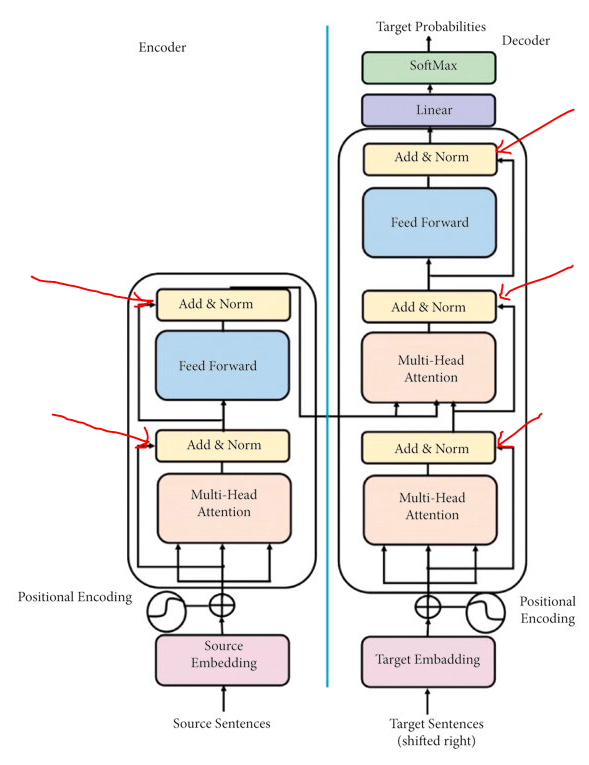

The Layer Normalization class below performs layer normalization on the input data. During its forward pass, we compute the mean and standard deviation of the input data. We then normalize the input data by subtracting the mean and dividing by the standard deviation plus a small number called epsilon to avoid any divisions by zero. This process results in a normalized output with a mean of 0 and a standard deviation of 1. We then scale the normalized output by a learnable parameter, gamma, and add another learnable parameter, beta. The training process is responsible for adjusting these parameters. The final result is a layer-normalized tensor, which ensures that the scale of the inputs to layers in the network is consistent.

In [ ]:
# Creating Layer Normalization
class LayerNormalization(nn.Module):

    def __init__(self, eps: float = 10**-6) -> None: # We define epsilon as 0.000001 to avoid division by zero
        super().__init__()
        self.eps = eps

        # We define alpha as a trainable parameter and initialize it with ones
        self.gamma = nn.Parameter(torch.ones(1)) # One-dimensional tensor that will be used to scale the input data

        # We define bias as a trainable parameter and initialize it with zeros
        self.beta = nn.Parameter(torch.zeros(1)) # One-dimensional tenso that will be added to the input data

    def forward(self, x):
        mean = x.mean(dim = -1, keepdim = True) # Computing the mean of the input data. Keeping the number of dimensions unchanged
        std = x.std(dim = -1, keepdim = True) # Computing the standard deviation of the input data. Keeping the number of dimensions unchanged

        # Returning the normalized input
        return self.alpha * (x-mean) / (std + self.eps) + self.bias

**The formula for Layer Normalization, as given by the "Attention Is All You Need" paper:**

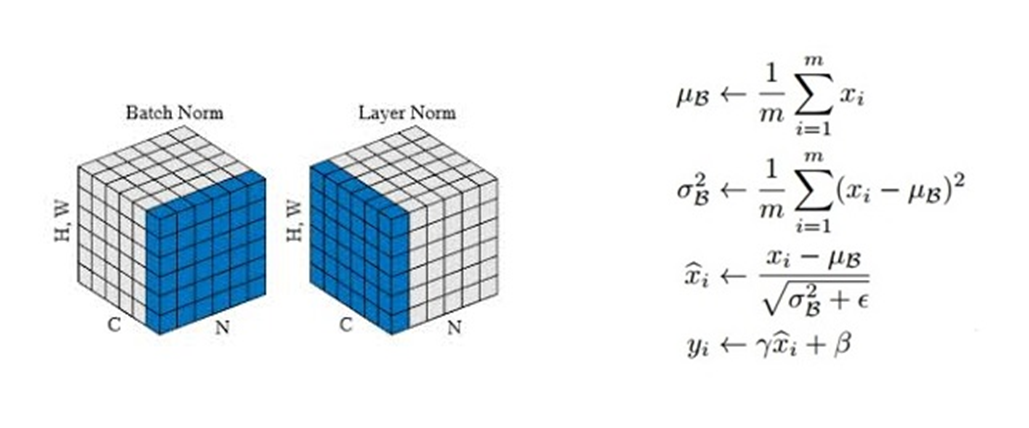

**The  final layer normalization formula is expressed as:**

$$ y_i = \gamma \left( \frac{x_i - \mu}{\sqrt{\sigma^2 + \epsilon}} \right) + \beta $$

where:

- \(**x_i**\) is the input vector for a single feature across all examples in the batch.
- \(**mu**\) is the mean of the feature.
- \(**sigma^2**\) is the variance of the feature.
- \(**epsilon**\) is a small constant added for numerical stability.
- \(**gamma**\) and \(**beta**\) are parameters to be learned during training.
- \(**y_i**\) is the normalized and scaled output vector.


# **Lets's breakdown this formula**

# **1.Batch Mean**

This is the code of Mean in our class..

In [ ]:
mean = x.mean(dim = -1, keepdim = True) # Computing the mean of the input data. Keeping the number of dimensions unchanged

Let's first discuss what is mean in our formula..

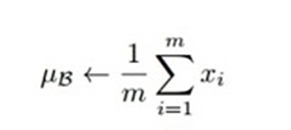


$\mu_{\mathcal{B}}$: Represents the mean of a batch ($\mathcal{B}$).<br>
$x_i$: Denotes the output from the previous layer for each element $i$ in the batch. This output is what we are normalizing in the context of layer normalization.<br>
$\Sigma$: The sigma symbol ($\Sigma$) signifies summation, which is used to aggregate multiple values simultaneously. In this context, it sums up the values across the size of the batch.<br>
$i=1$: Indicates the starting index from which we begin the summation.<br>
$m$: Refers to the batch size, indicating the endpoint for the summation. <br>For instance, if our batch size is 4, then $\Sigma$ sums up four values.<br>
$\Sigma/m$: After adding all the values together, dividing by the number of values (in this case, the batch size, $m$), yields the mean.

In simpler terms, the mean (
μ
B
 ) is calculated by summing all
xi
  values across the specified dimension and then dividing by the count of these values (
m). This process centers the data around zero, which is a crucial step in normalization.

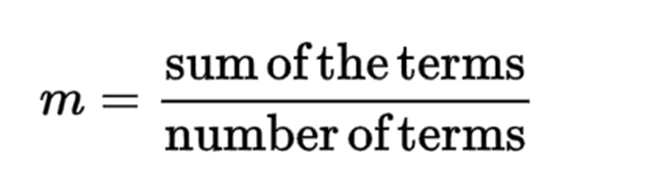

In [ ]:
mean = x.mean(dim = -1, keepdim = True)

so in our code **x.means** is simply calculating the means of our input data whic we are getting from previous layer of transformer as you can see in the transformer pic

**dim = -1** simply means that we are calculating the mean of our last dimension , as you knowin pytorch -1 represent the last dimension

**keepdim = True:**it ensures that the output has the same number of dimensions as the input, which aids in maintaining consistent tensor shapes for subsequent operations.

# **2.Batch Standard Deviation**

In [ ]:
std = x.std(dim = -1, keepdim = True) # Computing the standard deviation of the input data. Keeping the number of dimensions unchanged

in forwardpass 2nd code is **std = x.std(dim = -1, keepdim = True)** where we are finding the standard deviation , to understand this code forst we have to undersatnd what is standard deviation

as you can see below we can find standard deviation by taking the square rooot of vraiance ,



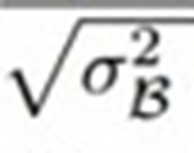

but i think you guys do not know variance ,so  Lets First See what is variance ?   <br>

**Batch Variance**

as you know we alredy get the mean , now we can calculate Variance

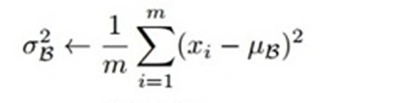

**σ2B** : Batch variance   <br>

**Again Σ is for summation** <br>
**xi**: means inputs (which is commming from previous layer in the form of outputs)<br>
**x̄B**: means (batch mean of inputs , which we get from batch mean section,upper) <br>
**1/m** ,again here **m** means batch size or total number of values

**So , the formula became...**

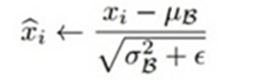

as you cann see we are taking square root of variance which means we are finding standard diavation , but as you can see we also add E(epsilon) in the formula ,so let see what is epsilon and why we add it in our fomula?

**Epsilon**

this is the code variable for epsilon ..

In [ ]:
self.eps

Here we add E(epsilon) ,(which will be small value)<br>
We add this value here because standard deviation is in denominator , if denominator become zero ,then our function will not output value, because any value not devisible with zero , so we add small value in the form of epsilon , we will revient our denominator to become zero <br>

Till here we mean centered our data like m=0<br>
And  standard deviation =1


Here we add
ϵ (epsilon)(which will be a small value). We add this value here because the standard deviation is in the denominator; if the denominator becomes zero, then our function will not output a value, because any value is not divisible by zero. So, we add a small value in the form of epsilon, we will prevent our denominator from becoming zero.

Up to this point, we have centered our data such that
m=0 and the standard deviation
=
1


In [ ]:
std = x.std(dim = -1, keepdim = True)

again in the code dim=-1 : means we are finding the standard deviation for the last demension ,and keepdim=True mean we want our final out demision unchanged

# **4.LayerNorm**

So our final formula for layer norm will become

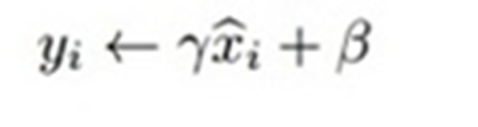

in code this is our final formula

In [ ]:
 self.gamma * (x-mean) / (std + self.eps) + self.beta

Here xi is this

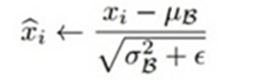

here Gamma is a  Learnable parameters (by multiplying with gamma , we are scalling )

In [ ]:
 self.gamma = nn.Parameter(torch.ones(1))

here Beta is  Learnable parameters (by adding with beta , we are shifting)

In [ ]:
self.beta = nn.Parameter(torch.zeros(1))

Initally we start gamma value by 1 and beta value from 0, but they will learn through backprogation(training) <br>

Every neuron in hidden layer ,will have there own gamma and beta parameters


**Note:**

Before gamma and beta , we were centered our dta to mean , but then why we are again scalling our data by gamma ,and shifting our data by beta , it is because sometime our data need other distribution for better result , so we are giving free hand to our model ,because it is learnable parameters,so if our model feel  to scale our data for better  result then he can etc
Means ,model and has free hand , if it want only normalization then  good, but if nt , then he can adjust data according to gamma and beta value


In [ ]:
 self.gamma * (x-mean) / (std + self.eps) + self.beta

so in our final code we are just simply mulitpling gamma and adding beta into our previous code

this is the simply code and explanation

# **Advantages of LayerNormalization**

1.	It makes training more stable
2.	It makes training faster
3.	It can act as reguralizer(little bit)